Balaji Kartheek (200968080)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df  =pd.read_csv("/content/drive/MyDrive/Colab (Deep Learning)/Datasets/IMDB/Train.csv")
test_df  =pd.read_csv("/content/drive/MyDrive/Colab (Deep Learning)/Datasets/IMDB/Test.csv")
valid_df  =pd.read_csv("/content/drive/MyDrive/Colab (Deep Learning)/Datasets/IMDB/Valid.csv")

In [ ]:
train_df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
test_df

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [ ]:
valid_df


,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0
...,...,...
4995,"Man, I loved this movie! This really takes me ...",1
4996,Recovery is an incredibly moving piece of work...,1
4997,"You can take the crook out of the joint, but i...",1
4998,FUTZ is the only show preserved from the exper...,1


In [ ]:
print("Train Dataset")
print(train_df['label'].value_counts())

print("Test Dataset")
print(test_df['label'].value_counts())

print("Valid Dataset")
print(valid_df['label'].value_counts())

# train,test,valid dataset is almost balanced

Train Dataset
0    20019
1    19981
Name: label, dtype: int64
Test Dataset
1    2505
0    2495
Name: label, dtype: int64
Valid Dataset
1    2514
0    2486
Name: label, dtype: int64


 ## Train Dataset

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


Text(0.5, 1.0, 'Sentiment Data Distribution')

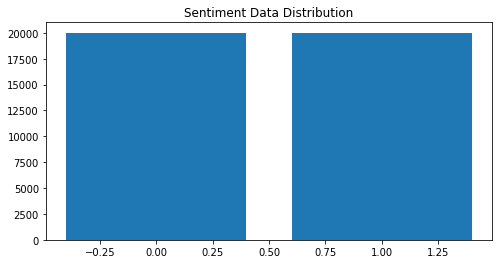

In [ ]:
val_count = train_df.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 38.3 MB/s 
     |████████████████████████████████| 287 kB 71.8 MB/s 


In [ ]:
from tensorflow.keras.layers import TextVectorization
import string
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from textblob import TextBlob
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


from plotly.offline import iplot

import contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
train_df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


### Text Preprocessing Functions

In [ ]:
def remove_URL(text):
   
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [ ]:
def remove_non_ascii(text):
    
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable])

In [ ]:
def remove_punct(text):
    
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
def lemmatize_word(text):
   

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in text]
    return lemma

  

In [ ]:
def remove_html(text):
   
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [ ]:
def remove_stop_words(text):
  tokens = []
  for token in text.split():
    if token not in stop_words:
      tokens.append(token)
  return " ".join(tokens)

In [ ]:
def text_cleaning(df, stop_words):

    # lowering the case 
    df['text'] = df['text'].apply(lambda x:' '.join(x.lower() for x in x.split()))

    # contractions is used to get the proper format of the text (Normalization of the text)

    df["text"] = df["text"].apply(lambda x: contractions.fix(x))

   # remove urls from the text

    df["text"] = df["text"].apply(lambda x: remove_URL(x))

    # remove html tags from the text

    df["text"] = df["text"].apply(lambda x: remove_html(x))

    # TOKENIZATION

    df['tokens'] = df['text'].apply(word_tokenize)  

    # LEMMATIZATION
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

      
    df['lemmatized'] = df['text'].apply(lambda x: lemmatizer.lemmatize(x))
    df['text'] = df['lemmatized']

    # Removing stop words

    df['text'] = df['text'].apply(lambda x: remove_stop_words(x))

    # Spelling Corrections          (spelling correction is taking more time to run )

    #  df['text'] = df['text'].apply(lambda x: TextBlob(x).correct())

  

    return df

stop_words = stopwords.words('english')



In [ ]:
new_train = text_cleaning(train_df, stop_words)
new_valid = text_cleaning(valid_df, stop_words)
new_test = text_cleaning(test_df, stop_words)

In [ ]:
train_df

,text,label,tokens,lemmatized
0,grew (b. 1965) watching loving thunderbirds. m...,0,"[i, grew, up, (, b, ., 1965, ), watching, and,...",i grew up (b. 1965) watching and loving the th...
1,"put movie dvd player, sat coke chips, expectat...",0,"[when, i, put, this, movie, in, my, dvd, playe...","when i put this movie in my dvd player, and sa..."
2,people know particular time past like feel nee...,0,"[why, do, people, who, do, not, know, what, a,...",why do people who do not know what a particula...
3,"even though great interest biblical movies, bo...",0,"[even, though, i, have, great, interest, in, b...",even though i have great interest in biblical ...
4,die hard dads army fan nothing ever change tha...,1,"[i, am, a, die, hard, dads, army, fan, and, no...",i am a die hard dads army fan and nothing will...
...,...,...,...,...
39995,"""western union"" something forgotten classic we...",1,"[``, western, union, '', is, something, of, a,...","""western union"" is something of a forgotten cl..."
39996,movie incredible piece work. explores every no...,1,"[this, movie, is, an, incredible, piece, of, w...",this movie is an incredible piece of work. it ...
39997,wife watched movie plan visit sicily stromboli...,0,"[my, wife, and, i, watched, this, movie, becau...",my wife and i watched this movie because we pl...
39998,"first watched flatliners, amazed. necessary fe...",1,"[when, i, first, watched, flatliners, ,, i, wa...","when i first watched flatliners, i was amazed...."


In [ ]:
print("Test: ", TextBlob("sleapy and tehre is no plaxe I'm gioong to.").correct())

Test:  sleepy and there is no place I'm going to.


In [ ]:
new_train

,text,label,tokens,lemmatized
0,grew (b. 1965) watching loving thunderbirds. m...,0,"[i, grew, up, (, b, ., 1965, ), watching, and,...",i grew up (b. 1965) watching and loving the th...
1,"put movie dvd player, sat coke chips, expectat...",0,"[when, i, put, this, movie, in, my, dvd, playe...","when i put this movie in my dvd player, and sa..."
2,people know particular time past like feel nee...,0,"[why, do, people, who, do, not, know, what, a,...",why do people who do not know what a particula...
3,"even though great interest biblical movies, bo...",0,"[even, though, i, have, great, interest, in, b...",even though i have great interest in biblical ...
4,die hard dads army fan nothing ever change tha...,1,"[i, am, a, die, hard, dads, army, fan, and, no...",i am a die hard dads army fan and nothing will...
...,...,...,...,...
39995,"""western union"" something forgotten classic we...",1,"[``, western, union, '', is, something, of, a,...","""western union"" is something of a forgotten cl..."
39996,movie incredible piece work. explores every no...,1,"[this, movie, is, an, incredible, piece, of, w...",this movie is an incredible piece of work. it ...
39997,wife watched movie plan visit sicily stromboli...,0,"[my, wife, and, i, watched, this, movie, becau...",my wife and i watched this movie because we pl...
39998,"first watched flatliners, amazed. necessary fe...",1,"[when, i, first, watched, flatliners, ,, i, wa...","when i first watched flatliners, i was amazed...."


In [ ]:
new_valid

,text,label,tokens,lemmatized
0,14 years since sharon stone awarded viewers le...,0,"[it, is, been, about, 14, years, since, sharon...",it is been about 14 years since sharon stone a...
1,someone needed make car payment... truly awful...,0,"[someone, needed, to, make, a, car, payment, ....",someone needed to make a car payment... this i...
2,guidelines state comment must contain minimum ...,0,"[the, guidelines, state, that, a, comment, mus...",the guidelines state that a comment must conta...
3,movie muddled mish-mash clichés recent cinema....,0,"[this, movie, is, a, muddled, mish-mash, of, c...",this movie is a muddled mish-mash of clichés f...
4,stan laurel became smaller half all-time great...,0,"[before, stan, laurel, became, the, smaller, h...",before stan laurel became the smaller half of ...
...,...,...,...,...
4995,"man, loved movie! really takes back kid. days ...",1,"[man, ,, i, loved, this, movie, !, this, reall...","man, i loved this movie! this really takes me ..."
4996,"recovery incredibly moving piece work, handlin...",1,"[recovery, is, an, incredibly, moving, piece, ...",recovery is an incredibly moving piece of work...
4997,"take crook joint, seems exceedingly difficult ...",1,"[you, can, take, the, crook, out, of, the, joi...","you can take the crook out of the joint, but i..."
4998,futz show preserved experimental theatre movem...,1,"[futz, is, the, only, show, preserved, from, t...",futz is the only show preserved from the exper...


In [ ]:
new_test

,text,label,tokens,lemmatized
0,always wrote series complete stink-fest jim be...,0,"[i, always, wrote, this, series, off, as, bein...",i always wrote this series off as being a comp...
1,1st watched 12/7/2002 - 3 10(dir-steve purcell...,0,"[1st, watched, 12/7/2002, -, 3, out, of, 10, (...",1st watched 12/7/2002 - 3 out of 10(dir-steve ...
2,movie poorly written directed fell asleep 30 m...,0,"[this, movie, was, so, poorly, written, and, d...",this movie was so poorly written and directed ...
3,interesting thing miryang (secret sunshine) ac...,1,"[the, most, interesting, thing, about, miryang...",the most interesting thing about miryang (secr...
4,"first read ""berlin meer"" expect much. thought ...",0,"[when, i, first, read, about, ``, berlin, am, ...","when i first read about ""berlin am meer"" i did..."
...,...,...,...,...
4995,"kind picture john lassiter would making today,...",1,"[this, is, the, kind, of, picture, john, lassi...",this is the kind of picture john lassiter woul...
4996,must see! saw whipped press screening hilariou...,1,"[a, must, see, !, i, saw, whipped, at, a, pres...",a must see! i saw whipped at a press screening...
4997,nbc ashamed. would allow children see this. de...,0,"[nbc, should, be, ashamed, ., i, would, not, a...",nbc should be ashamed. i would not allow my ch...
4998,movie clumsy mishmash various ghost-story susp...,0,"[this, movie, is, a, clumsy, mishmash, of, var...",this movie is a clumsy mishmash of various gho...


## Distribution of unigram, bigram in the training dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer counts the unique words

In [ ]:
def get_top_n_words(x, n=None):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_words(train_df['text'], 20)
common_words

[('movie', 70510),
 ('film', 63632),
 ('like', 32284),
 ('good', 23912),
 ('time', 20160),
 ('really', 18552),
 ('story', 18477),
 ('bad', 14744),
 ('people', 14577),
 ('great', 14484),
 ('make', 12783),
 ('way', 12655),
 ('movies', 12273),
 ('characters', 11609),
 ('think', 11466),
 ('watch', 11129),
 ('character', 11122),
 ('films', 11074),
 ('seen', 10763),
 ('love', 10550)]

In [ ]:
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])
df1

,Unigram Text,Count
0,movie,70510
1,film,63632
2,like,32284
3,good,23912
4,time,20160
5,really,18552
6,story,18477
7,bad,14744
8,people,14577
9,great,14484


In [ ]:
def get_top_n_bigram(x, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
bigrams = get_top_n_bigram(train_df['text'], 20)
bigrams

[('special effects', 1792),
 ('low budget', 1467),
 ('looks like', 1373),
 ('year old', 1270),
 ('good movie', 1215),
 ('waste time', 1215),
 ('sci fi', 1153),
 ('watch movie', 1098),
 ('look like', 1082),
 ('years ago', 1021),
 ('new york', 1019),
 ('real life', 1003),
 ('movie like', 958),
 ('high school', 929),
 ('main character', 925),
 ('movie really', 908),
 ('pretty good', 907),
 ('movie seen', 856),
 ('bad movie', 852),
 ('watching movie', 835)]

In [ ]:
df2 = pd.DataFrame(bigrams, columns = ['Bigram Text' , 'Count'])
df2

,Bigram Text,Count
0,special effects,1792
1,low budget,1467
2,looks like,1373
3,year old,1270
4,good movie,1215
5,waste time,1215
6,sci fi,1153
7,watch movie,1098
8,look like,1082
9,years ago,1021


## Visualize the practical words that represent positive and negative sentiment in the training dataset

### Positive Words

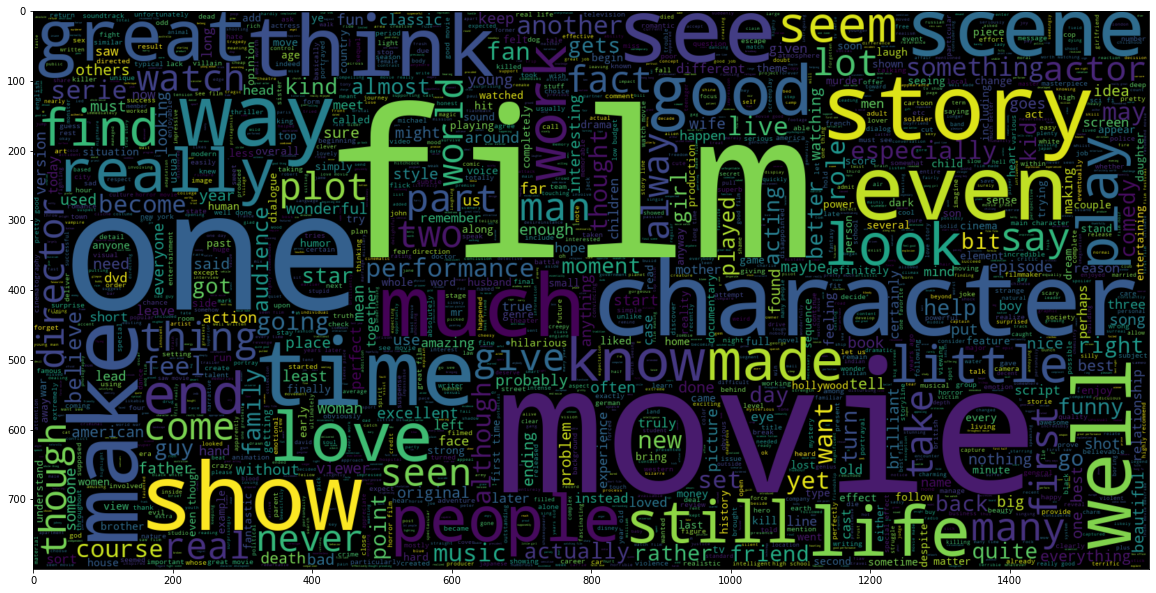

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_df[train_df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

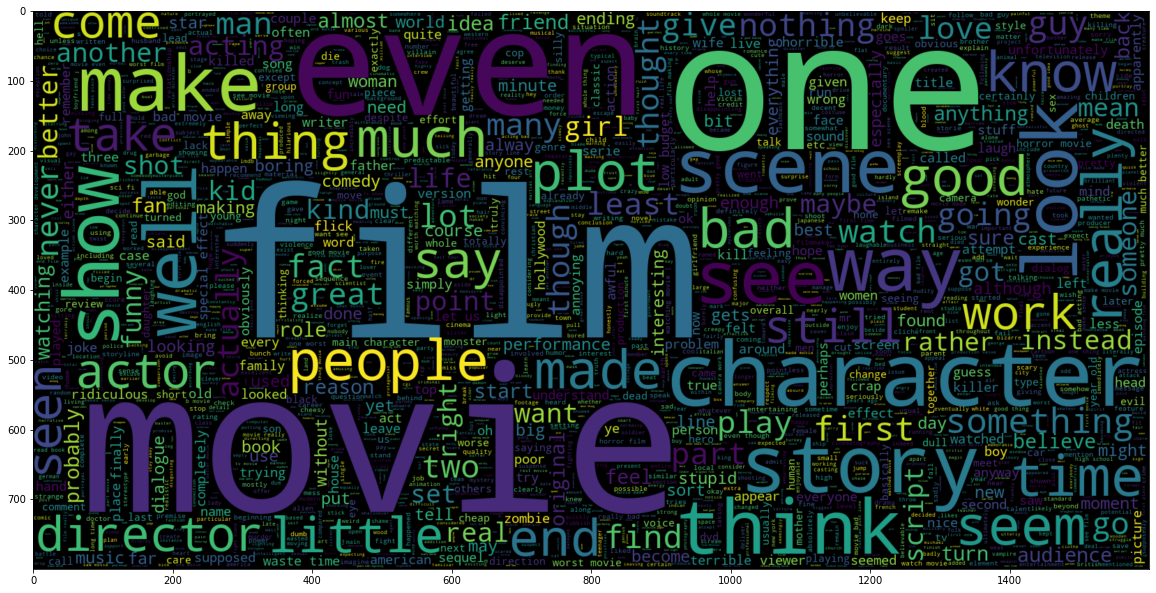

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_df[train_df.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

Word Embedding is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

We use the pre-trained embedding models

The pretrained Word Embedding like GloVe & Word2Vec gives more insights for a word which can be used for classification.

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

In [ ]:
new_train['text'][0]

'grew (b. 1965) watching loving thunderbirds. mates school watched. played "thunderbirds" school, lunch school. wanted virgil scott. one wanted alan. counting 5 became art form. took children see movie hoping would get glimpse loved child. bitterly disappointing. high point snappy theme tune. could compare original score thunderbirds. thankfully early saturday mornings one television channel still plays reruns series gerry anderson wife created. jonatha frakes hand directors chair, version completely hopeless. waste film. utter rubbish. cgi remake may acceptable replacing marionettes homo sapiens subsp. sapiens huge error judgment.'

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GlobalMaxPool1D

In [ ]:
vocabulary_size = 5000  # all the words will have the index values ranging between 1 and 5000

In [ ]:
new_train['text']

0        grew (b. 1965) watching loving thunderbirds. m...
1        put movie dvd player, sat coke chips, expectat...
2        people know particular time past like feel nee...
3        even though great interest biblical movies, bo...
4        die hard dads army fan nothing ever change tha...
                               ...                        
39995    "western union" something forgotten classic we...
39996    movie incredible piece work. explores every no...
39997    wife watched movie plan visit sicily stromboli...
39998    first watched flatliners, amazed. necessary fe...
39999    would film good, gross estimated $95,000,000 a...
Name: text, Length: 40000, dtype: object

### One-Hot Representation

In [ ]:
one_hot_rep = [one_hot(words,vocabulary_size) for words in new_train['text']]
one_hot_rep_valid = [one_hot(words,vocabulary_size) for words in new_valid['text']]
one_hot_rep_test = [one_hot(words,vocabulary_size) for words in new_test['text']]


# here each sentence is one-hot encoded such that each words in a sentence wil contain a value between 1 to vocabulary_size

In [ ]:
sentence_len = 128    # maximum number of words in the all sentences

embedded_docs = pad_sequences(one_hot_rep,padding = 'pre',maxlen = sentence_len)
embedded_docs

array([[   0,    0,    0, ..., 3277, 4294,  390],
       [3643, 2587, 1635, ..., 1397, 3323, 1716],
       [   0,    0,    0, ...,   24, 2756,   24],
       ...,
       [   0,    0,    0, ...,  212, 1144, 4142],
       [   0,    0,    0, ..., 3417, 4258, 1045],
       [   0,    0,    0, ..., 3860, 2645,  360]], dtype=int32)

In [ ]:
embedded_docs_valid = pad_sequences(one_hot_rep_valid,padding = 'pre',maxlen = sentence_len)
embedded_docs_valid

array([[  24, 4900, 1670, ...,  564, 3287, 1045],
       [   0,    0,    0, ..., 1211, 1758, 2596],
       [   0,    0,    0, ..., 4837,  542,   24],
       ...,
       [   0,    0,    0, ..., 2348, 3057, 4457],
       [3903,  735, 1910, ..., 3297, 2351, 1443],
       [   0,    0,    0, ..., 2702, 3207, 3365]], dtype=int32)

In [ ]:
embedded_docs_test = pad_sequences(one_hot_rep_test,padding = 'pre',maxlen = sentence_len)
embedded_docs_test

array([[ 855, 3375,  955, ..., 2042, 3009, 3703],
       [   0,    0,    0, ..., 2351,  222, 3027],
       [   0,    0,    0, ..., 3210, 1045, 3045],
       ...,
       [   0,    0,    0, ..., 4663, 2459,  913],
       [   0,    0,    0, ..., 2307, 2307, 2307],
       [   0,    0,    0, ...,  116, 2724, 2788]], dtype=int32)

In [ ]:
embedding_dim = 100   # converting each value in the embedded_docs we are converting it into a feature vector of size 100

# LSTM Model with 15 layers

In [ ]:
lstm = Sequential()
lstm.add(Embedding(vocabulary_size,
                    embedding_dim,
                    input_length = sentence_len))


# Add the  LSTM layers and some Dropout regularisation

for i in range(1,16):
  lstm.add(LSTM(20, return_sequences = True))
  lstm.add(Dropout(0.6))


lstm.add(GlobalMaxPool1D())

lstm.add(Dropout(0.5))
# Add the output layer
lstm.add(Dense(1, activation="sigmoid"))

# Compiling the LSTM
lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss = "binary_crossentropy",metrics=['accuracy'])

lstm.summary()

# Fitting the LSTM to the training set
x_train = embedded_docs
y_train = new_train['label']
x_valid = embedded_docs_valid
y_valid = new_valid['label']
x_test = embedded_docs_test
y_test = new_test['label']
hist_lstm = lstm.fit(x_train, y_train, epochs = 15, batch_size = 180,validation_data=(x_valid,y_valid))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 128, 100)          500000    
                                                                 
 lstm_75 (LSTM)              (None, 128, 20)           9680      
                                                                 
 dropout_81 (Dropout)        (None, 128, 20)           0         
                                                                 
 lstm_76 (LSTM)              (None, 128, 20)           3280      
                                                                 
 dropout_82 (Dropout)        (None, 128, 20)           0         
                                                                 
 lstm_77 (LSTM)              (None, 128, 20)           3280      
                                                                 
 dropout_83 (Dropout)        (None, 128, 20)          

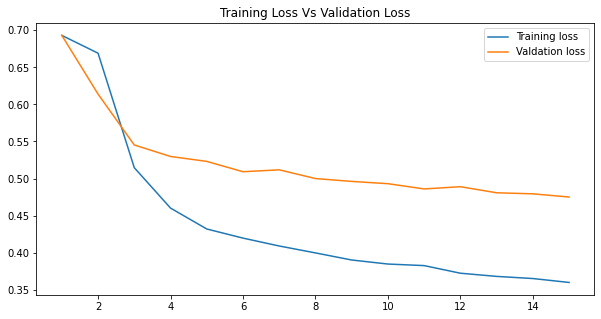

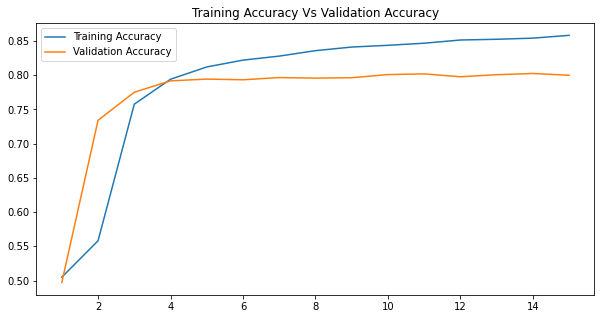

In [ ]:
loss = hist_lstm.history['loss']
acc = hist_lstm.history['accuracy']
val_loss = hist_lstm.history['val_loss']
val_acc = hist_lstm.history['val_accuracy']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Valdation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title("Training Accuracy Vs Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# Test accuracy
lstm.evaluate(x_test,y_test)

157/157 [==============================] - 5s 32ms/step - loss: 0.4706 - accuracy: 0.8094


[0.4705912470817566, 0.8094000220298767]

# BidirectionRNN with 20 layes

In [ ]:
birnn = Sequential()
birnn.add(Embedding(vocabulary_size,
                    embedding_dim,
                    input_length = sentence_len))


# Add the  BidirectionalRNN layers and some Dropout regularisation

for i in range(1,21):
  birnn.add(Bidirectional(LSTM(20,return_sequences = True)))
  birnn.add(Dropout(0.6))

birnn.add(Dropout(0.5))

# Add the output layer
birnn.add(Dense(1, activation="sigmoid"))

# Compiling the BidirectionalRNN
birnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss = "binary_crossentropy",metrics=['accuracy'])

birnn.summary()

# Fitting the BidirectionalRNN to the training set

hist_bidrnn = birnn.fit(x_train, y_train, epochs = 15, batch_size = 200,validation_data=(x_valid,y_valid))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 128, 100)          500000    
                                                                 
 bidirectional_14 (Bidirecti  (None, 128, 40)          19360     
 onal)                                                           
                                                                 
 dropout_110 (Dropout)       (None, 128, 40)           0         
                                                                 
 bidirectional_15 (Bidirecti  (None, 128, 40)          9760      
 onal)                                                           
                                                                 
 dropout_111 (Dropout)       (None, 128, 40)           0         
                                                                 
 bidirectional_16 (Bidirecti  (None, 128, 40)         

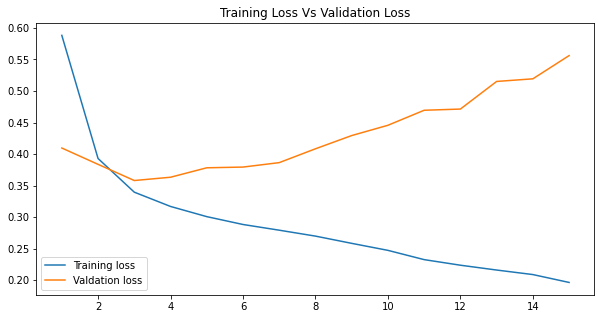

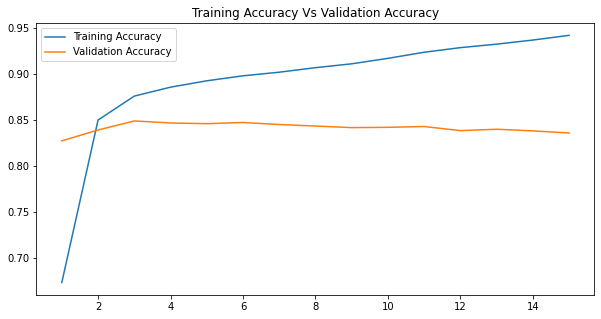

In [ ]:
loss = hist_bidrnn.history['loss']
acc = hist_bidrnn.history['accuracy']
val_loss = hist_bidrnn.history['val_loss']
val_acc = hist_bidrnn.history['val_accuracy']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Valdation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title("Training Accuracy Vs Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# Test accuracy
birnn.evaluate(x_test,y_test)

157/157 [==============================] - 24s 79ms/step - loss: 0.5181 - accuracy: 0.8461


[0.5180531740188599, 0.8460546731948853]

## Among the two models BidirectionalRNN is performing better than the LSTM because it refers to both the previous and the post text 

### Passing 10 own movie reviews

In [ ]:
test_reviews = {
  "Sometimes in a fondue there are varied types of cheeses including some fine as well as not very fine cheeses but I always like fondue.":1,
  "It was pretty boring, such a waste of time":0,
  "Don’t be fooled by the title for if you crave misery, injustice, sadness, and suicidal depression this film is all about that and nothing else.":0,
  "I only made it through about 20 minutes but that was enough to convince me it’s the ickiest movie.":0,
  "I loved the movie far more than i should have, nut that doesn't mean it is perfect":1,
  "Even a great movie about a story that has a shit ending Is still just a great movie with a shit ending.":0,
  "It is the rare movie that succeeds on every level":1,
  "It doesn't matter how much you enjoy film, you're better off saving your money, popcorn and time":0,
  "I can’t stop telling people to watch this movie.":1,
  "Impossibly good movie.":1
}
test_df = pd.DataFrame(list(test_reviews.items()),columns=["text","label"])
display(test_df)

,text,label
0,Sometimes in a fondue there are varied types o...,1
1,"It was pretty boring, such a waste of time",0
2,Don’t be fooled by the title for if you crave ...,0
3,I only made it through about 20 minutes but th...,0
4,"I loved the movie far more than i should have,...",1
5,Even a great movie about a story that has a sh...,0
6,It is the rare movie that succeeds on every level,1
7,"It doesn't matter how much you enjoy film, you...",0
8,I can’t stop telling people to watch this movie.,1
9,Impossibly good movie.,1


In [ ]:
new_test = text_cleaning(test_df, stop_words)



In [ ]:
one_hot_rep = [one_hot(words,vocabulary_size) for words in new_test['text']]
sentence_len = 128    # maximum number of words in the all sentences

embedded_docs = pad_sequences(one_hot_rep,padding = 'pre',maxlen = sentence_len)
embedded_docs


array([[   0,    0,    0, ..., 1363, 3628, 4759],
       [   0,    0,    0, ..., 3069, 4117, 4092],
       [   0,    0,    0, ...,   24,  417, 1796],
       ...,
       [   0,    0,    0, ..., 3603,  180, 4092],
       [   0,    0,    0, ..., 1847,   45, 1211],
       [   0,    0,    0, ...,  128, 1049, 1211]], dtype=int32)

In [ ]:
x_train = embedded_docs
y_train = new_test['label']

In [ ]:
lstm.evaluate(x_train,y_train)

1/1 [==============================] - 0s 133ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6938315629959106, 0.5]

In [ ]:
birnn.evaluate(x_train,y_train)

1/1 [==============================] - 0s 123ms/step - loss: 0.6904 - accuracy: 0.8000


[0.6903919577598572, 0.800000011920929]